In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
file_path = "dataset/Data_final.xlsx"
data = pd.read_excel(file_path)

In [42]:
data.dtypes

Miền                               object
Vùng                               object
Tỉnh                               object
Năm                                 int64
Dân số                              int64
Dân số nam                          int64
Dân số nữ                           int64
Dân số thành thị                    int64
Dân số nông thôn                    int64
Số lượng trang trại                 int64
Diện tích trồng lúa                 int64
Sản lượng lúa                       int64
Diện tích trồng ngô                 int64
Sản lượng ngô                       int64
Diện tích trồng khoai lang          int64
Sản lượng khoai lang                int64
Số lượng trâu                       int64
Số lượng bò                         int64
Số lượng lợn                        int64
Số lượng gia cầm                    int64
Diện tích rừng trồng mới            int64
Sản lượng gỗ khai thác              int64
Diện tích nuôi trồng thủy sản       int64
Sản lượng thủy sản                

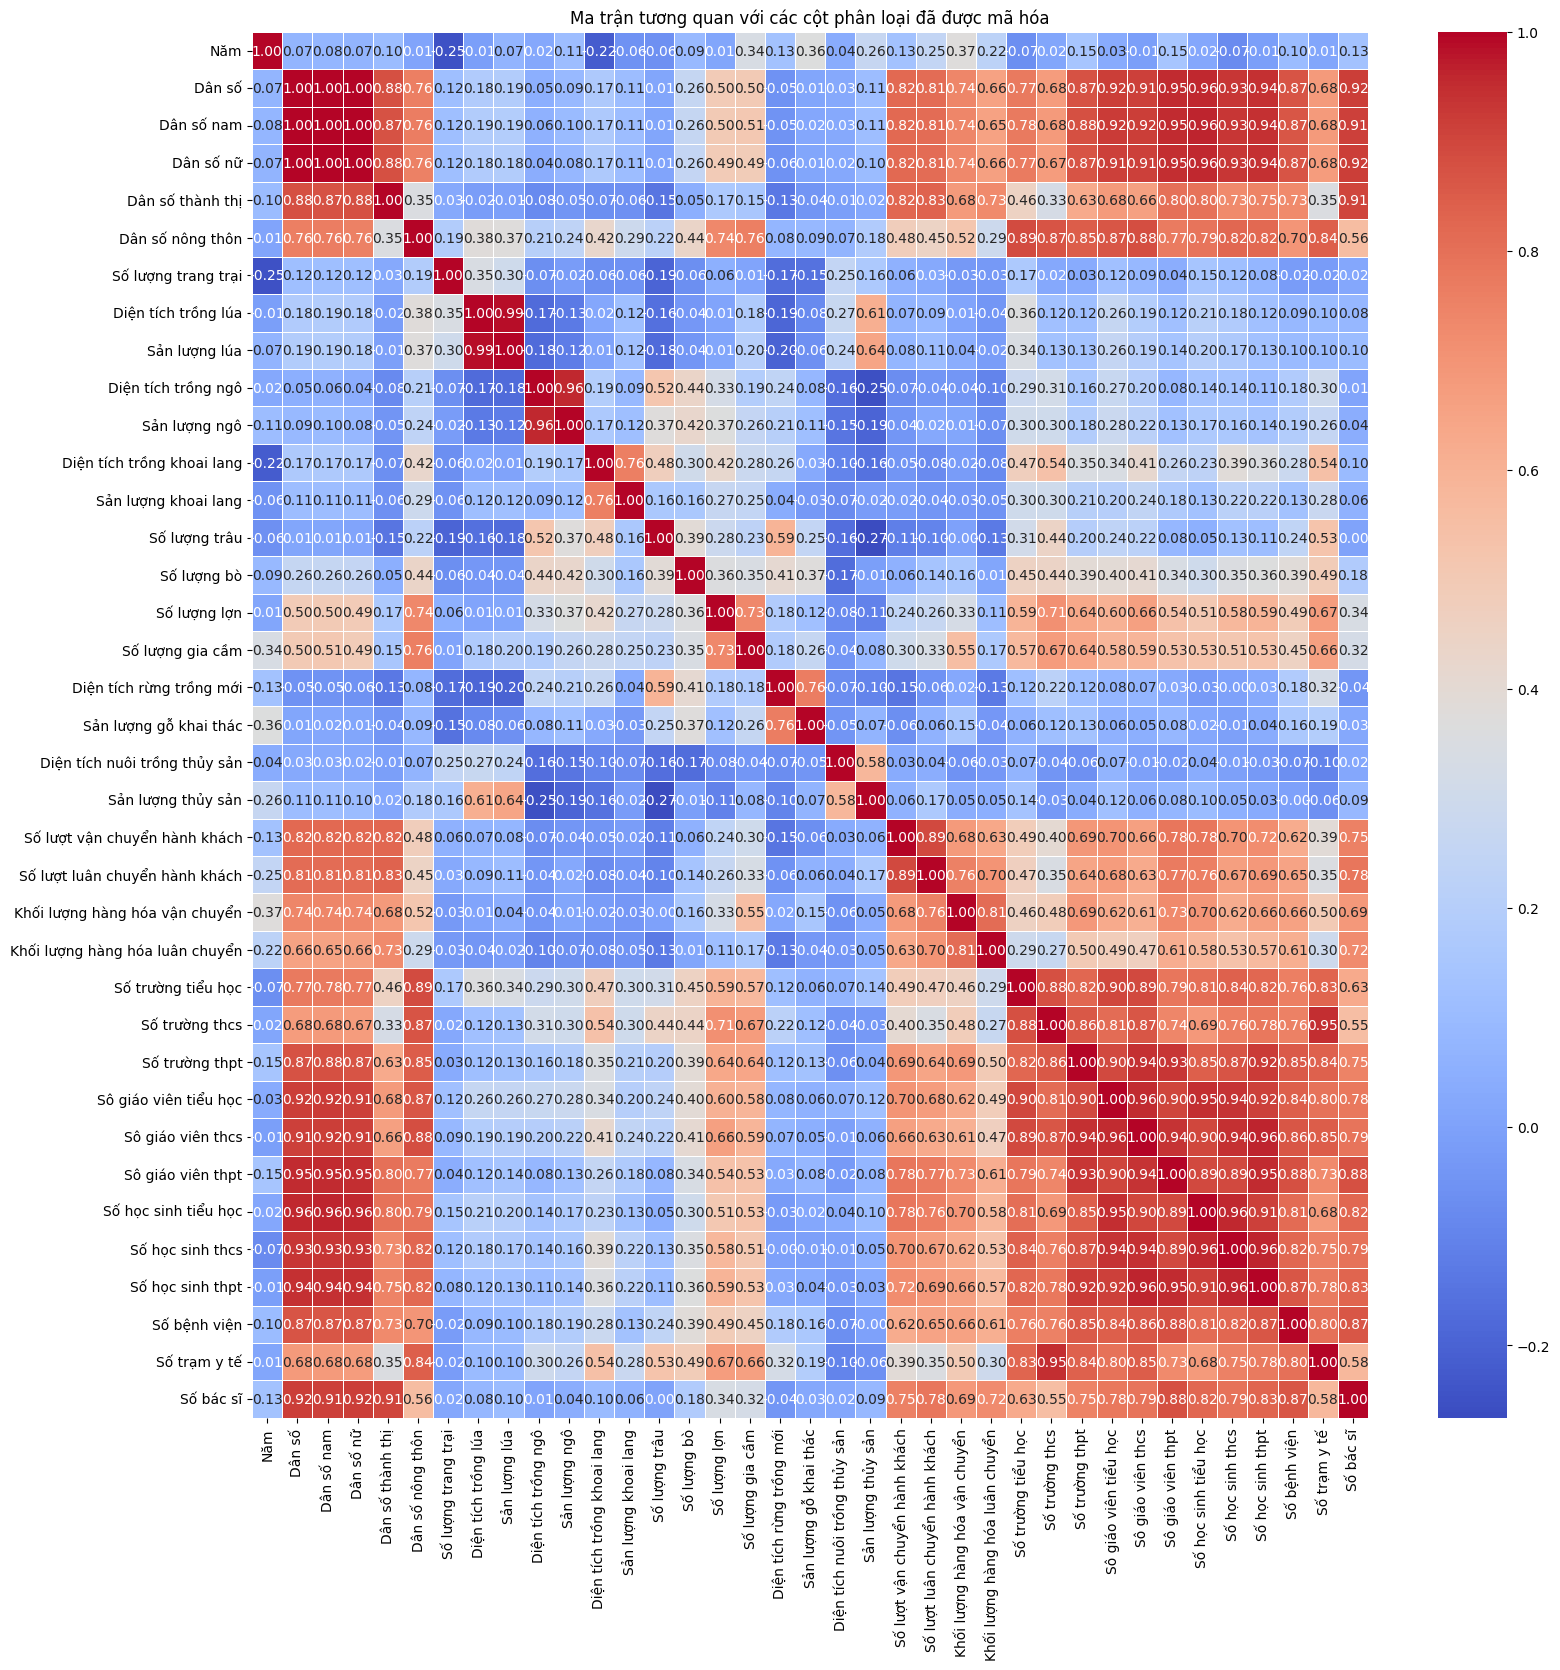

In [43]:
data = data.drop(columns=["Miền", "Vùng", "Tỉnh"])

# Lập ma trận tương quan
correlation_matrix = data.corr()

# Vẽ heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan với các cột phân loại đã được mã hóa")
plt.show()



Linear Regression Evaluation:
Mean Absolute Error (MAE): 161.46125608310473
Mean Squared Error (MSE): 44327.74199487173
Root Mean Squared Error (RMSE): 210.54154458175643
R-squared (R²): 0.8590744380200145


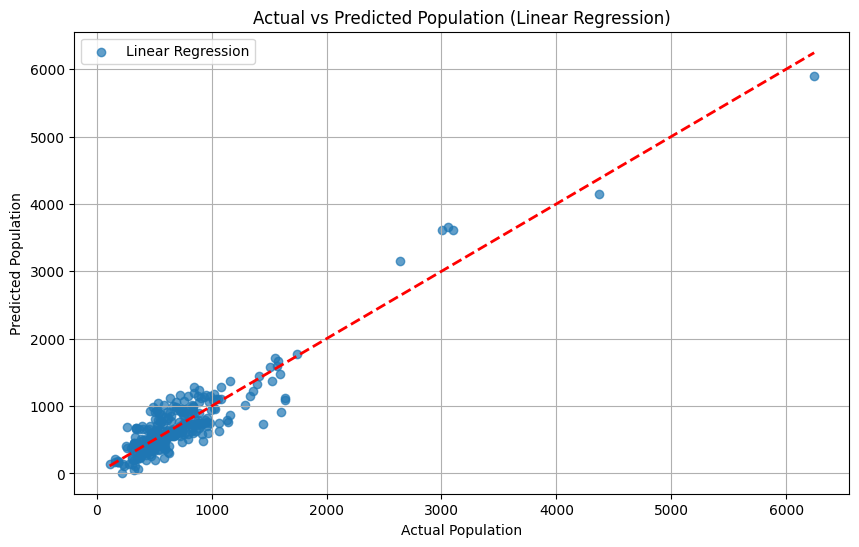


K-Nearest Neighbors Evaluation:
Mean Absolute Error (MAE): 156.94722222222222
Mean Squared Error (MSE): 139310.045
Root Mean Squared Error (RMSE): 373.2426087680773
R-squared (R²): 0.5571092616593614


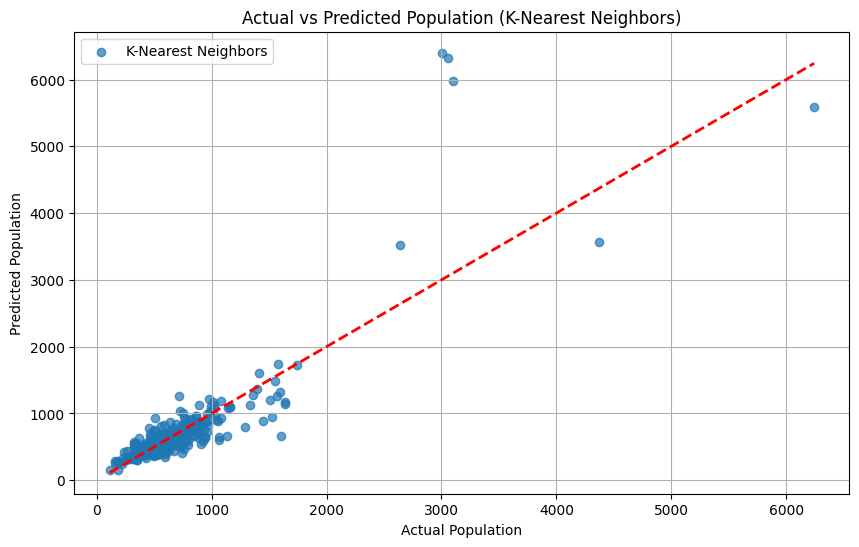


Decision Tree Evaluation:
Mean Absolute Error (MAE): 81.47019675925927
Mean Squared Error (MSE): 19165.377387152777
Root Mean Squared Error (RMSE): 138.4390746399035
R-squared (R²): 0.9390699490365316


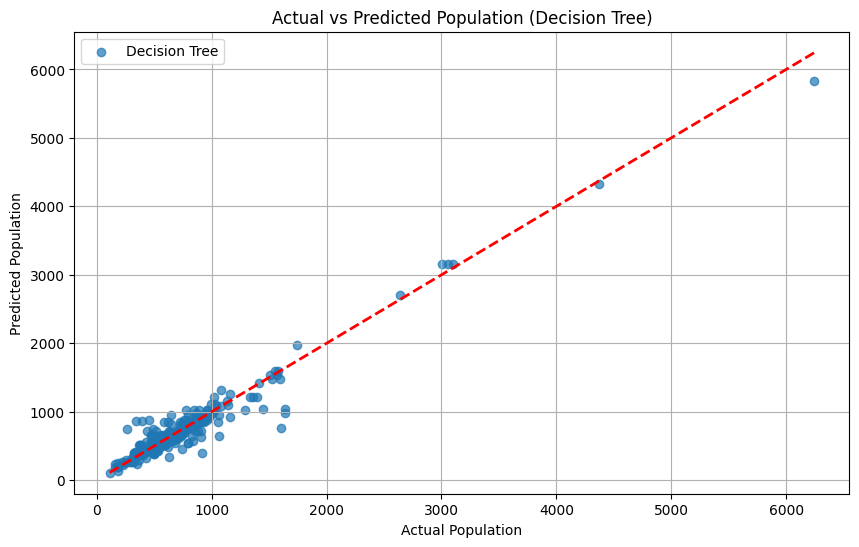


Random Forest Evaluation:
Mean Absolute Error (MAE): 78.04344489085373
Mean Squared Error (MSE): 17367.56359322133
Root Mean Squared Error (RMSE): 131.7860523470573
R-squared (R²): 0.9447855101692072


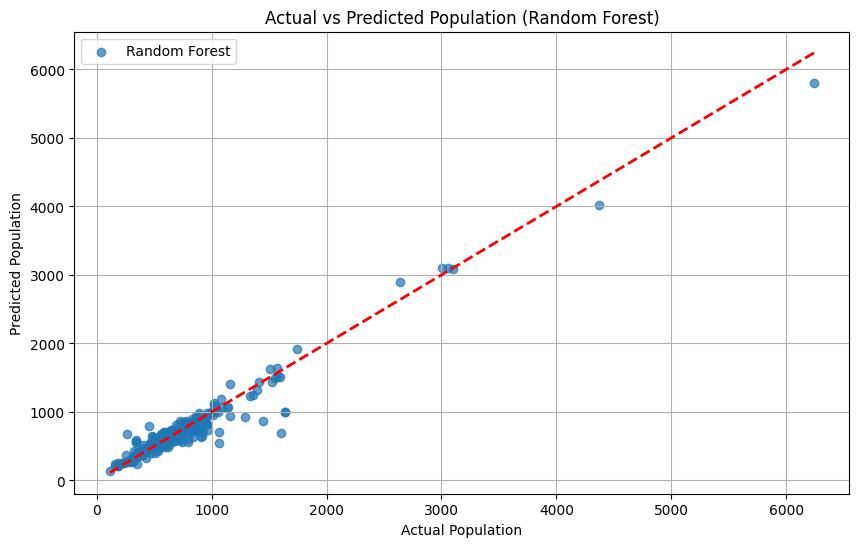

['population_prediction_rf_model.pkl']

In [ ]:
# Bước 2: Chọn đặc trưng và mục tiêu
features = [
    "Dân số", "Dân số nam", "Dân số nữ",
    "Số bệnh viện", "Số trạm y tế",
    "Số học sinh thpt"
]
target = "Số bác sĩ"
# Chọn X (features) và y (target)
X = data_encoded[features]
y = data_encoded[target]
# Bước 3: Chia dữ liệu thành tập train và test (xáo trộn dữ liệu)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

# Hàm đánh giá và vẽ biểu đồ
def evaluate_and_plot(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, label=model_name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f"Actual vs Predicted Population ({model_name})")
    plt.xlabel("Actual Population")
    plt.ylabel("Predicted Population")
    plt.legend()
    plt.grid(True)
    plt.show()

# Bước 4: Xây dựng và đánh giá các mô hình với tham số trực tiếp
models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5, weights="uniform", p=2),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=20, min_samples_split=5, min_samples_leaf=2),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2)
}

# Đánh giá và vẽ biểu đồ cho từng mô hình
for model_name, model in models.items():
    evaluate_and_plot(model, model_name)

# Lưu mô hình tốt nhất nếu cần
import joblib
joblib.dump(models["Random Forest"], "population_prediction_rf_model.pkl")
